In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv')
covid_19_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0


In [3]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
covid_19_df['Date'] = pd.to_datetime(covid_19_df['Date'], format='%d/%m/%Y')
covid_19_df['Country/Region'] = covid_19_df['Country/Region'].replace('Mainland China', 'China')
covid_19_df[covid_19_df['Country/Region'] == 'Guyana'].head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
210,NaN,Guyana,5.0,-58.75,2020-01-22,0.0,0.0,0.0
520,NaN,Guyana,5.0,-58.75,2020-01-23,0.0,0.0,0.0
830,NaN,Guyana,5.0,-58.75,2020-01-24,0.0,0.0,0.0


In [4]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
covid_19_df['Active'] = covid_19_df['Confirmed'] - covid_19_df['Deaths'] - covid_19_df['Recovered']
covid_19_df = covid_19_df.sort_values(by=['Date'], ascending=True)
covid_19_df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0,101.00,2020-01-22,2.0,0.0,0.0,2.0
210,NaN,Guyana,5.0,-58.75,2020-01-22,0.0,0.0,0.0,0.0


### Finding Countries with most confirmed cases

In [5]:
last_covid_df = covid_19_df[covid_19_df['Date'] == covid_19_df['Date'].max()].reset_index(drop=True)
last_covid_df = last_covid_df.drop(columns=['Lat', 'Long'])
top_50 = last_covid_df.groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(50)
top_50.head(2)

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81439.0,3274.0,72814.0,5351.0
Italy,59138.0,5476.0,7024.0,46638.0


In [6]:
def prepare_data(func):
    def inside(df, country):
        date_range = df['Date'].sort_values().drop_duplicates().reset_index(drop=True)
        df = df[df['Country/Region'] == country]
        if (country == 'China') | (country == 'US') | (country == 'Australia') | (country == 'Canada'):
            df = df.groupby('Date').sum()
        elif df[df['Province/State'] == country].notna().any().any():
            df = df[df['Province/State'] == country]
        df = df.sort_values(by='Date').reset_index(drop=True)
        func(df, country, date_range)
    return inside

In [7]:
@prepare_data
def show_increment(df, label, date_range):
    my_xticks = range(0, len(date_range), 10)
#     l_date_range = list(date_range)
    my_xticks_labels = list(date_range)[0:len(date_range):10]
    
    fig, ax = plt.subplots(figsize=(14, 5))
    ax = sns.lineplot(data=df[cases], ax=ax)
    ax.set_xticks(my_xticks)
    ax.set_xticklabels(my_xticks_labels)
    ax.set_xlabel(label)
    plt.show()

### Plots for 50 countries with most confirmed cases

1 . China
Confirmed: 81439.0 
Active: 5351.0 
Recovered: 72814.0 
Deaths: 3274.0


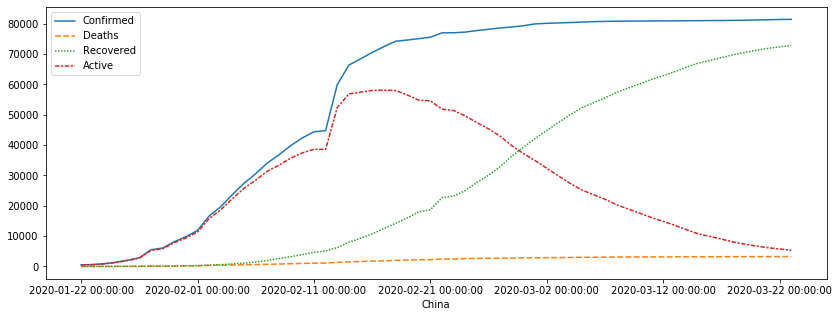

2 . Italy
Confirmed: 59138.0 
Active: 46638.0 
Recovered: 7024.0 
Deaths: 5476.0


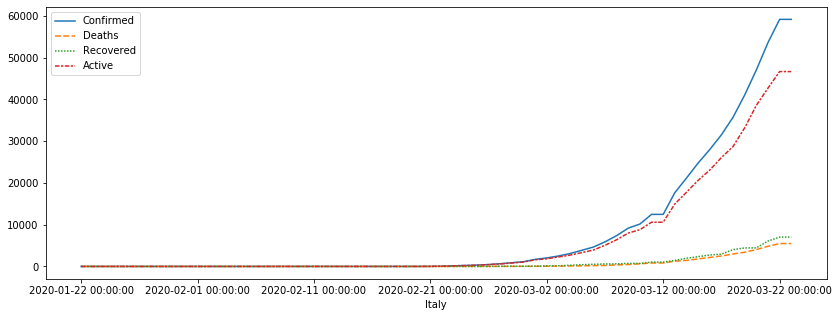

3 . US
Confirmed: 33276.0 
Active: 32681.0 
Recovered: 178.0 
Deaths: 417.0


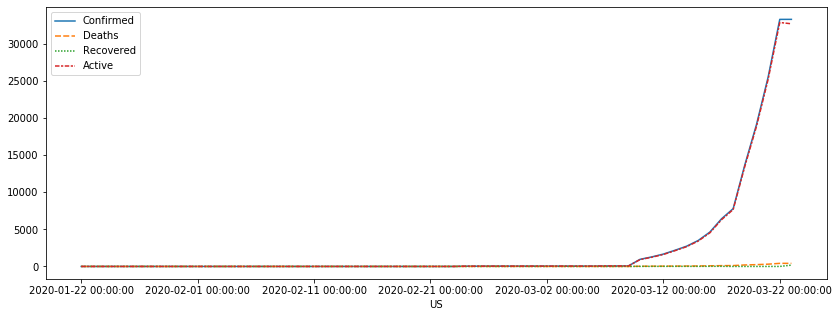

4 . Spain
Confirmed: 28768.0 
Active: 24421.0 
Recovered: 2575.0 
Deaths: 1772.0


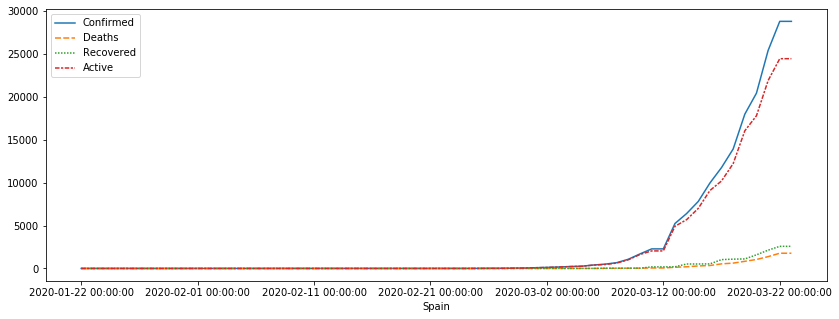

5 . Germany
Confirmed: 24873.0 
Active: 24513.0 
Recovered: 266.0 
Deaths: 94.0


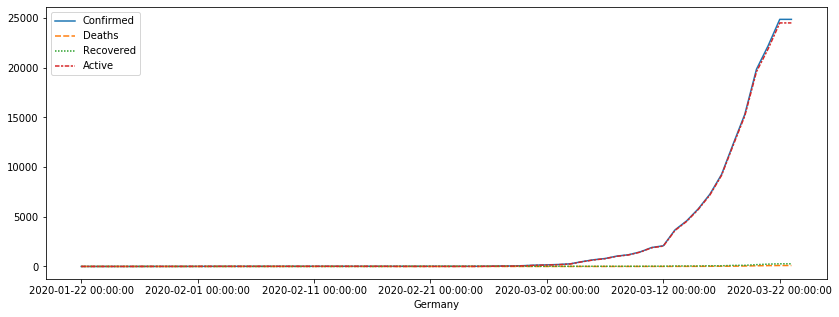

6 . Iran
Confirmed: 21638.0 
Active: 12022.0 
Recovered: 7931.0 
Deaths: 1685.0


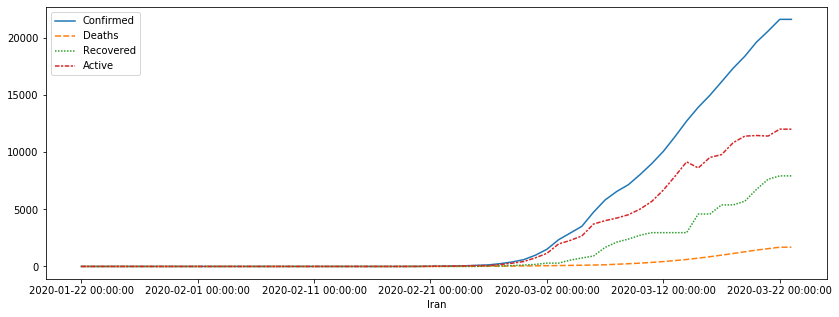

7 . France
Confirmed: 16044.0 
Active: 13170.0 
Recovered: 2200.0 
Deaths: 674.0


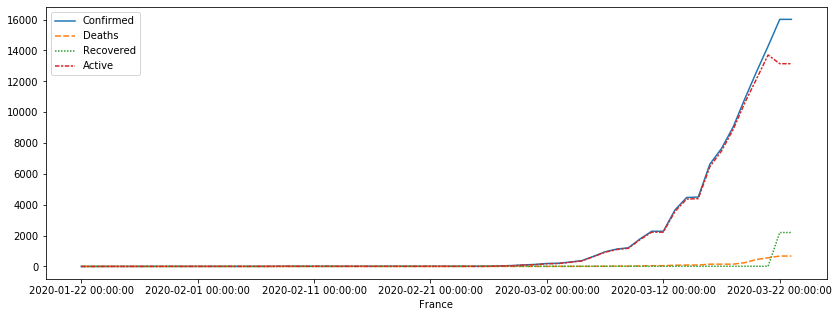

8 . Korea, South
Confirmed: 8897.0 
Active: 5884.0 
Recovered: 2909.0 
Deaths: 104.0


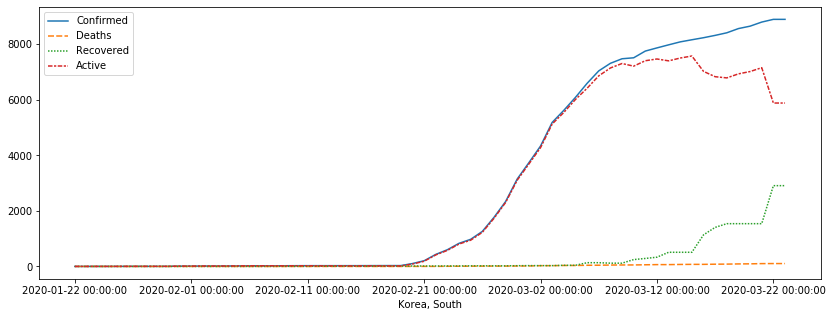

9 . Switzerland
Confirmed: 7245.0 
Active: 7016.0 
Recovered: 131.0 
Deaths: 98.0


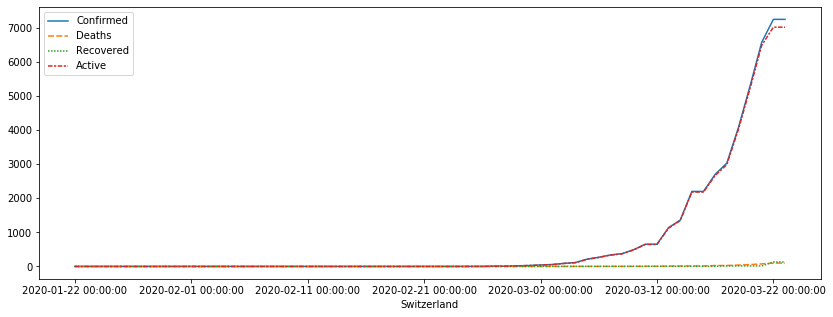

10 . United Kingdom
Confirmed: 5741.0 
Active: 5392.0 
Recovered: 67.0 
Deaths: 282.0


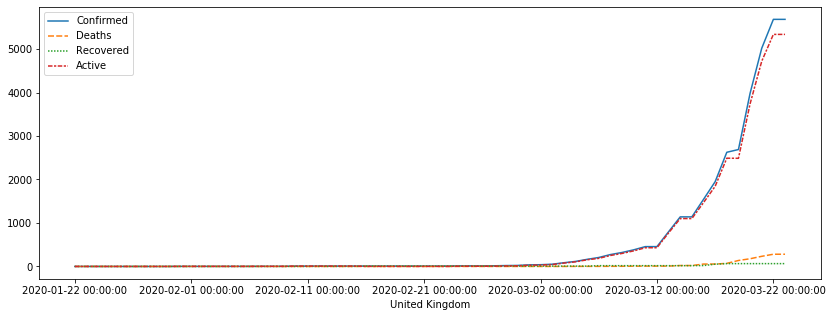

11 . Netherlands
Confirmed: 4216.0 
Active: 4034.0 
Recovered: 2.0 
Deaths: 180.0


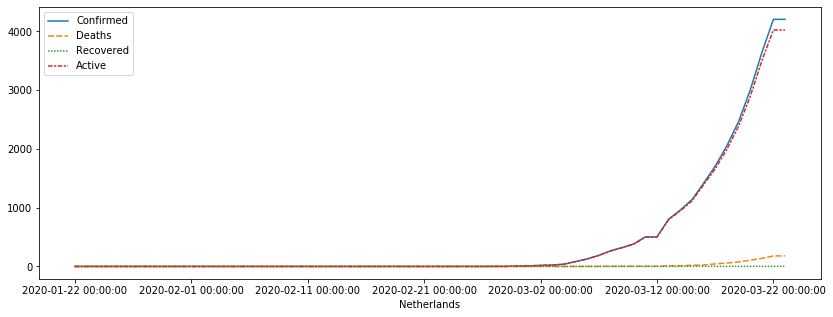

12 . Belgium
Confirmed: 3401.0 
Active: 3063.0 
Recovered: 263.0 
Deaths: 75.0


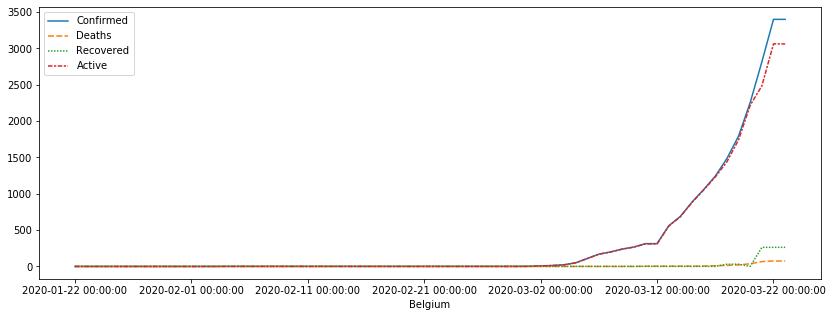

13 . Austria
Confirmed: 3244.0 
Active: 3219.0 
Recovered: 9.0 
Deaths: 16.0


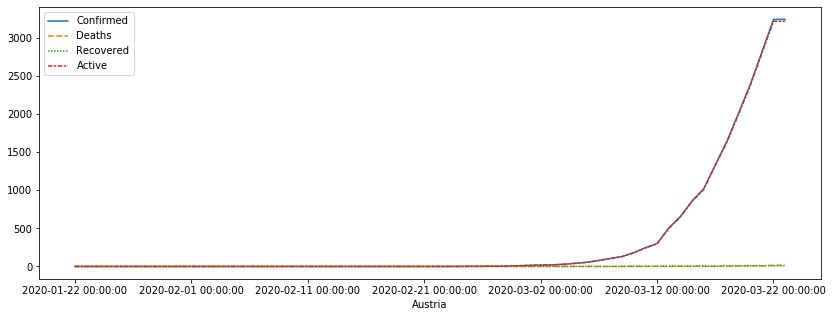

14 . Norway
Confirmed: 2383.0 
Active: 2375.0 
Recovered: 1.0 
Deaths: 7.0


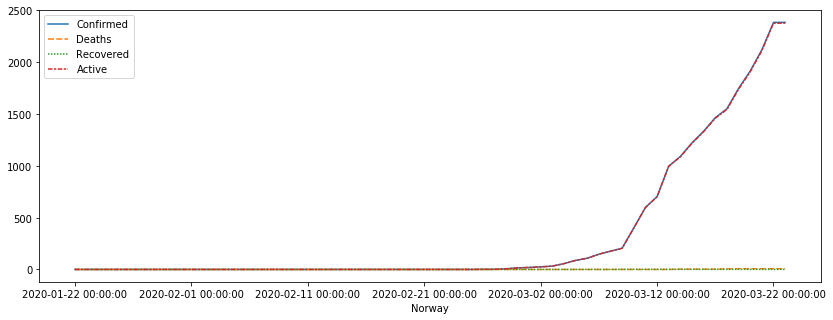

15 . Sweden
Confirmed: 1934.0 
Active: 1897.0 
Recovered: 16.0 
Deaths: 21.0


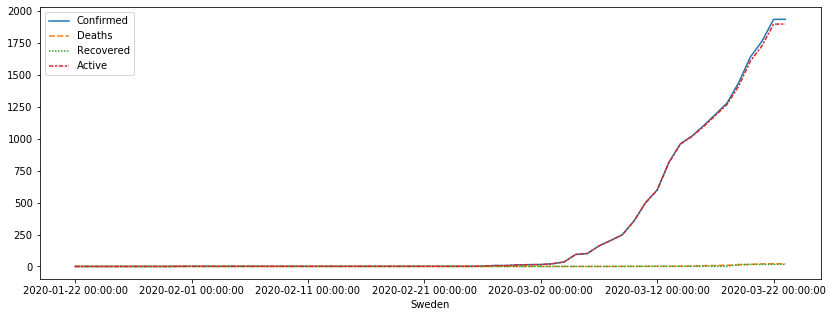

16 . Portugal
Confirmed: 1600.0 
Active: 1581.0 
Recovered: 5.0 
Deaths: 14.0


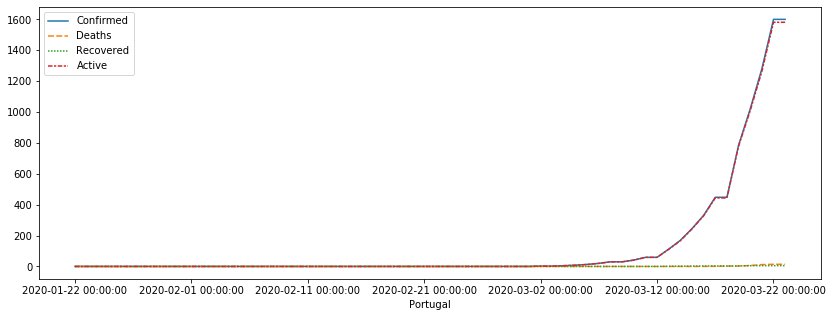

17 . Brazil
Confirmed: 1593.0 
Active: 1566.0 
Recovered: 2.0 
Deaths: 25.0


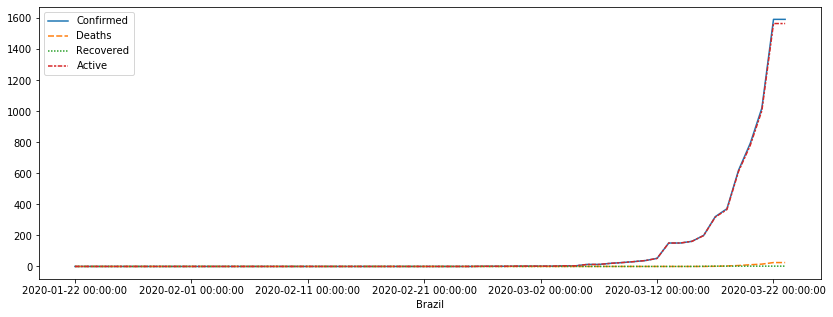

18 . Denmark
Confirmed: 1514.0 
Active: 1500.0 
Recovered: 1.0 
Deaths: 13.0


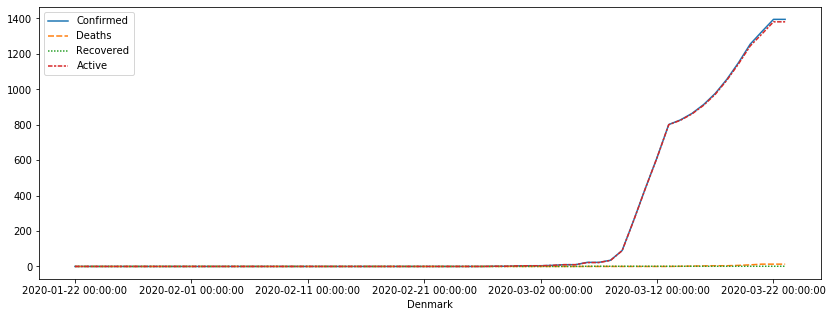

19 . Canada
Confirmed: 1470.0 
Active: 1439.0 
Recovered: 10.0 
Deaths: 21.0


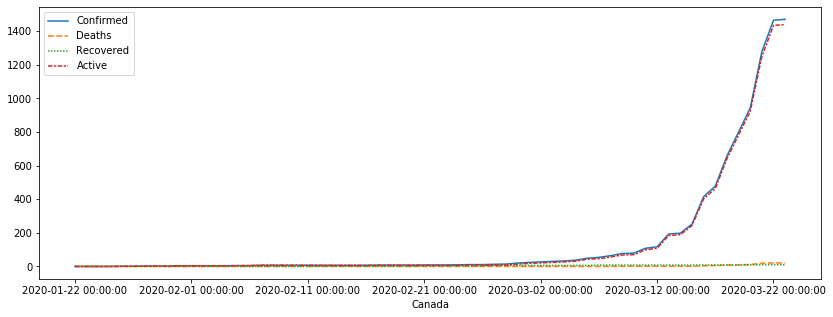

20 . Australia
Confirmed: 1314.0 
Active: 1219.0 
Recovered: 88.0 
Deaths: 7.0


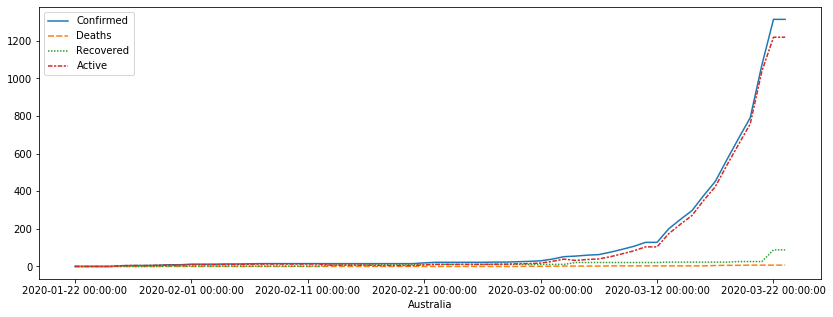

21 . Malaysia
Confirmed: 1306.0 
Active: 1157.0 
Recovered: 139.0 
Deaths: 10.0


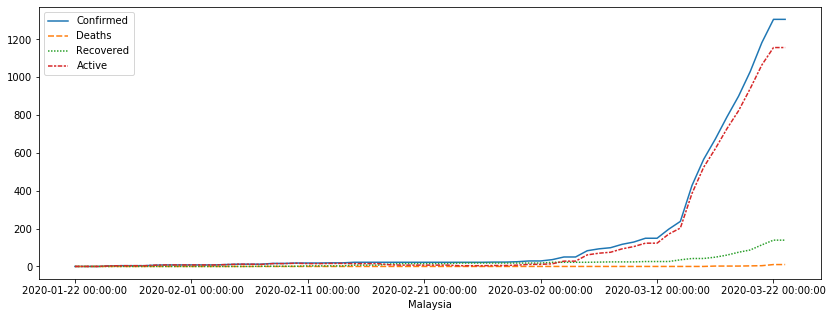

22 . Turkey
Confirmed: 1236.0 
Active: 1206.0 
Recovered: 0.0 
Deaths: 30.0


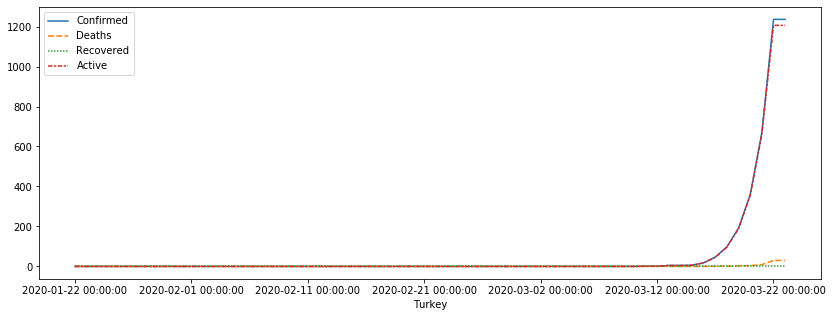

23 . Czechia
Confirmed: 1120.0 
Active: 1113.0 
Recovered: 6.0 
Deaths: 1.0


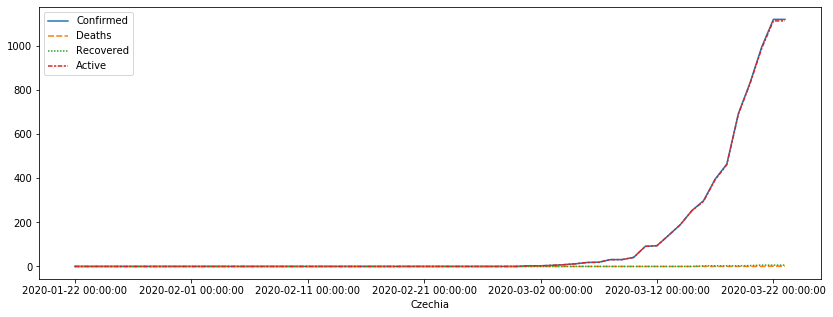

24 . Japan
Confirmed: 1086.0 
Active: 811.0 
Recovered: 235.0 
Deaths: 40.0


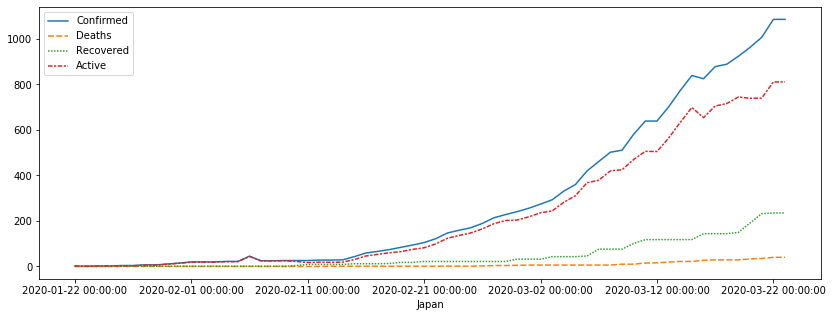

25 . Israel
Confirmed: 1071.0 
Active: 1033.0 
Recovered: 37.0 
Deaths: 1.0


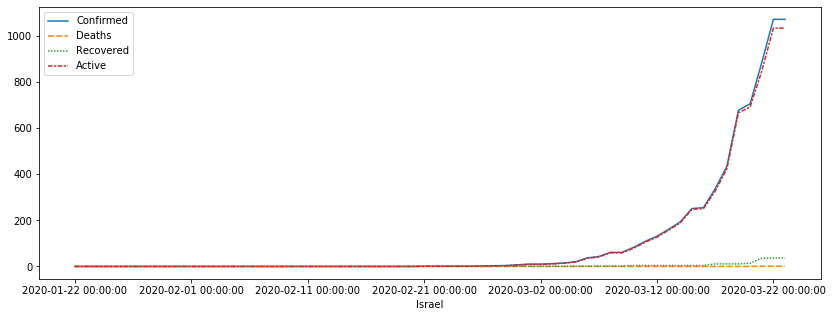

26 . Ireland
Confirmed: 906.0 
Active: 897.0 
Recovered: 5.0 
Deaths: 4.0


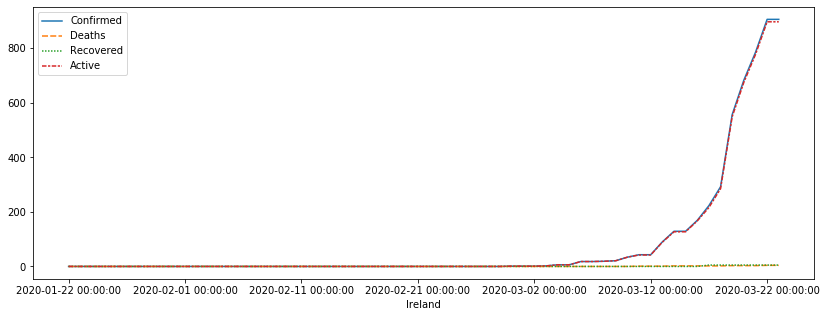

27 . Luxembourg
Confirmed: 798.0 
Active: 784.0 
Recovered: 6.0 
Deaths: 8.0


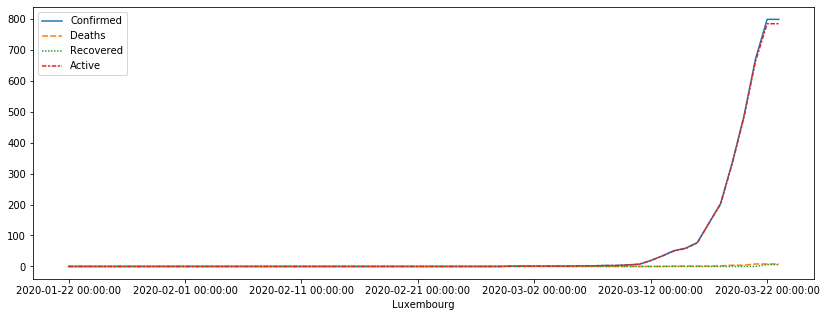

28 . Ecuador
Confirmed: 789.0 
Active: 772.0 
Recovered: 3.0 
Deaths: 14.0


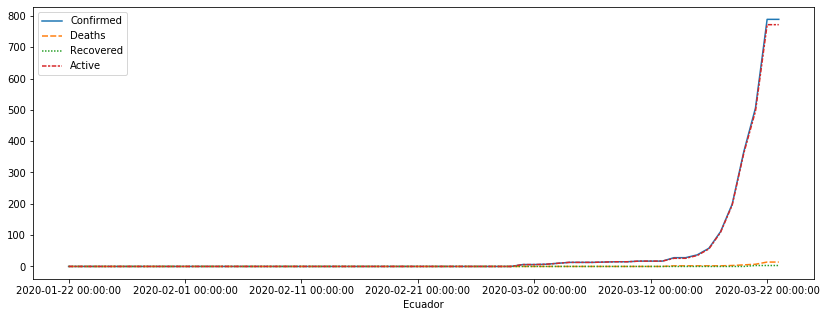

29 . Pakistan
Confirmed: 776.0 
Active: 766.0 
Recovered: 5.0 
Deaths: 5.0


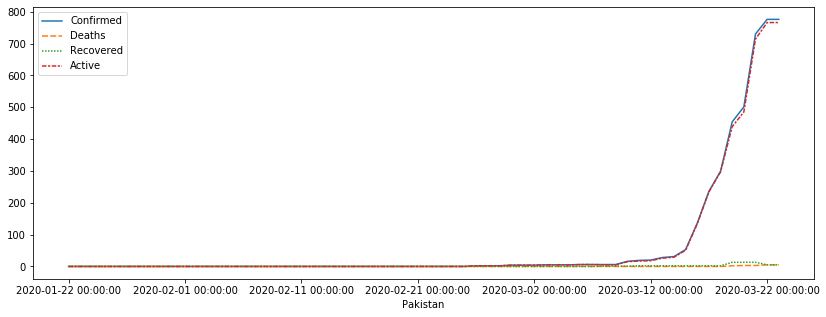

30 . Cruise Ship
Confirmed: 712.0 
Active: 379.0 
Recovered: 325.0 
Deaths: 8.0


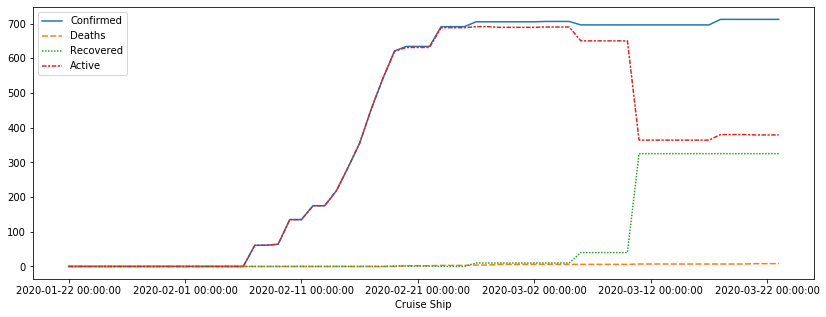

31 . Poland
Confirmed: 634.0 
Active: 626.0 
Recovered: 1.0 
Deaths: 7.0


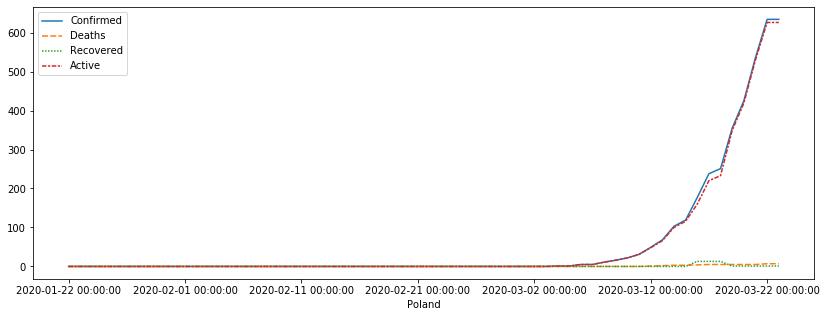

32 . Chile
Confirmed: 632.0 
Active: 623.0 
Recovered: 8.0 
Deaths: 1.0


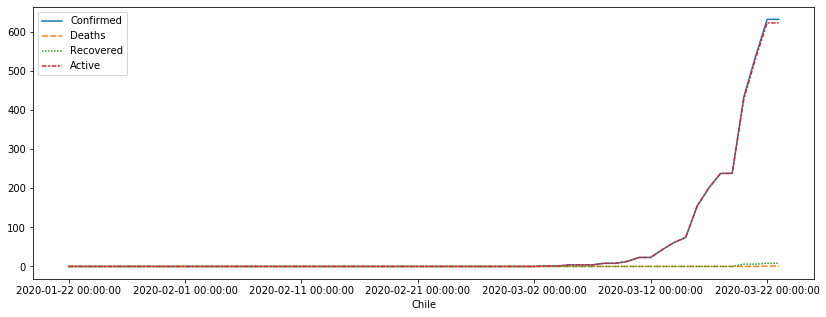

33 . Finland
Confirmed: 626.0 
Active: 615.0 
Recovered: 10.0 
Deaths: 1.0


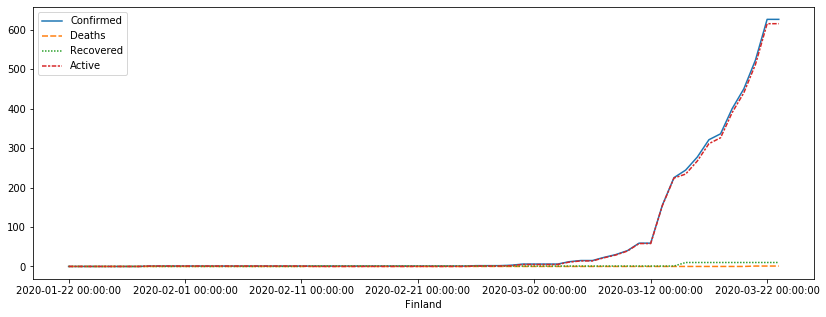

34 . Greece
Confirmed: 624.0 
Active: 590.0 
Recovered: 19.0 
Deaths: 15.0


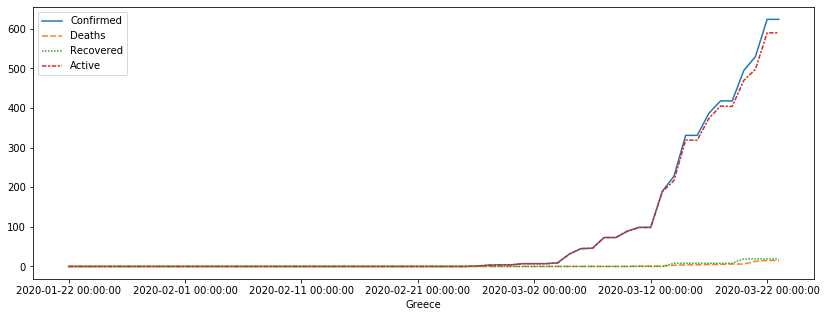

35 . Thailand
Confirmed: 599.0 
Active: 554.0 
Recovered: 44.0 
Deaths: 1.0


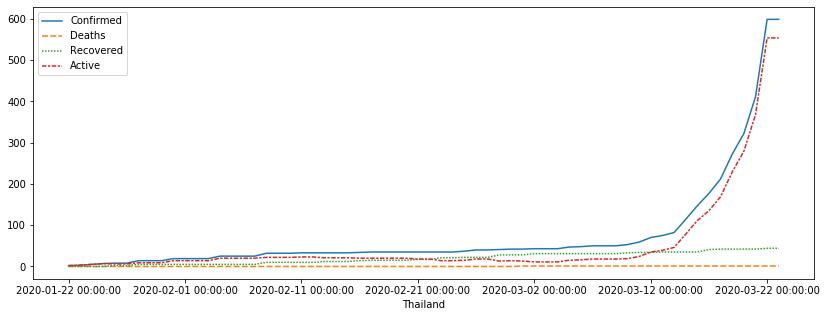

36 . Iceland
Confirmed: 568.0 
Active: 531.0 
Recovered: 36.0 
Deaths: 1.0


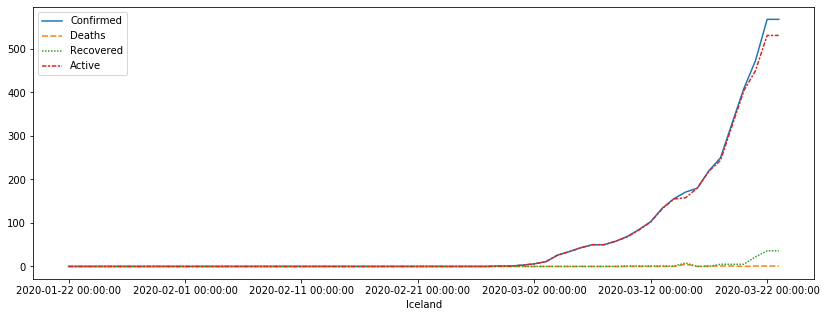

37 . Indonesia
Confirmed: 514.0 
Active: 437.0 
Recovered: 29.0 
Deaths: 48.0


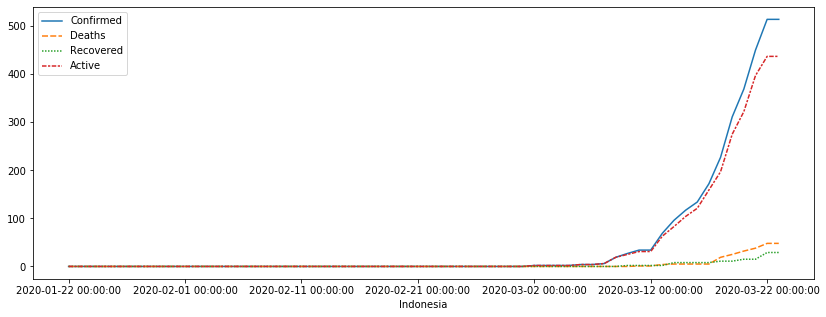

38 . Saudi Arabia
Confirmed: 511.0 
Active: 495.0 
Recovered: 16.0 
Deaths: 0.0


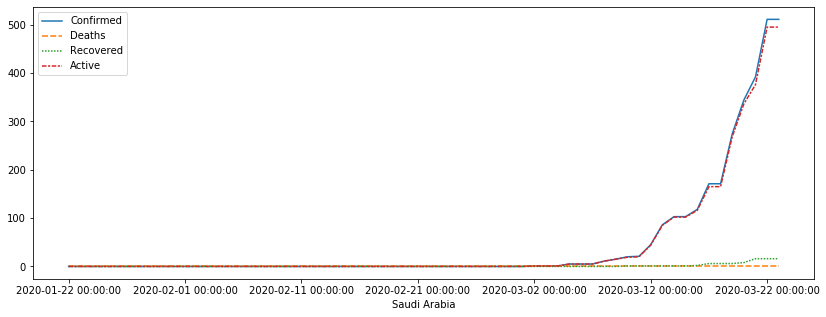

39 . Qatar
Confirmed: 494.0 
Active: 461.0 
Recovered: 33.0 
Deaths: 0.0


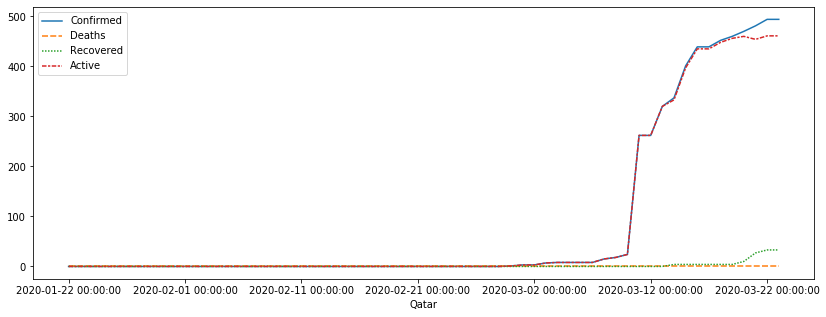

40 . Singapore
Confirmed: 455.0 
Active: 309.0 
Recovered: 144.0 
Deaths: 2.0


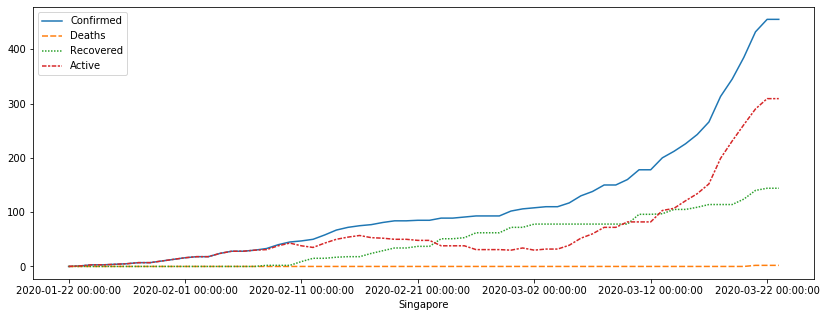

41 . Romania
Confirmed: 433.0 
Active: 366.0 
Recovered: 64.0 
Deaths: 3.0


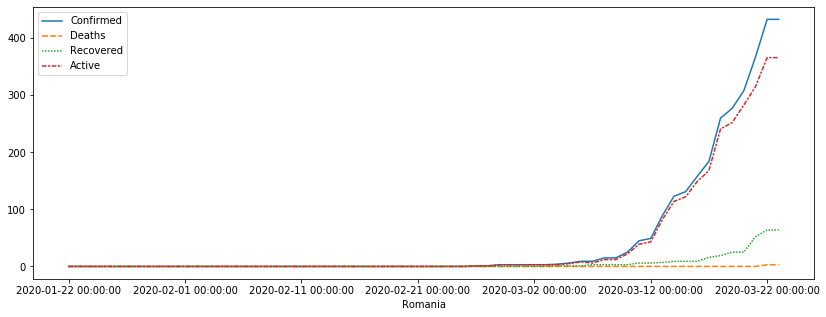

42 . Slovenia
Confirmed: 414.0 
Active: 412.0 
Recovered: 0.0 
Deaths: 2.0


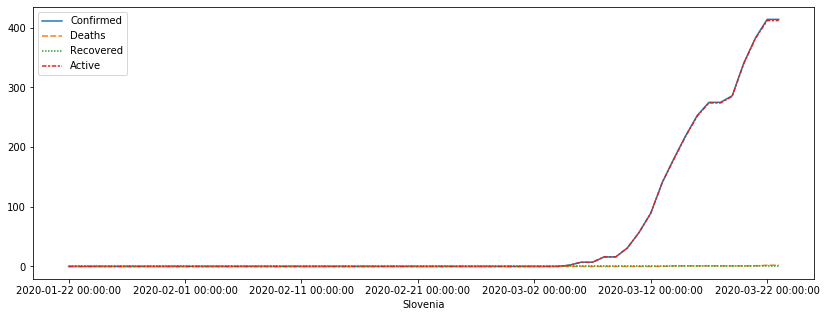

43 . India
Confirmed: 396.0 
Active: 362.0 
Recovered: 27.0 
Deaths: 7.0


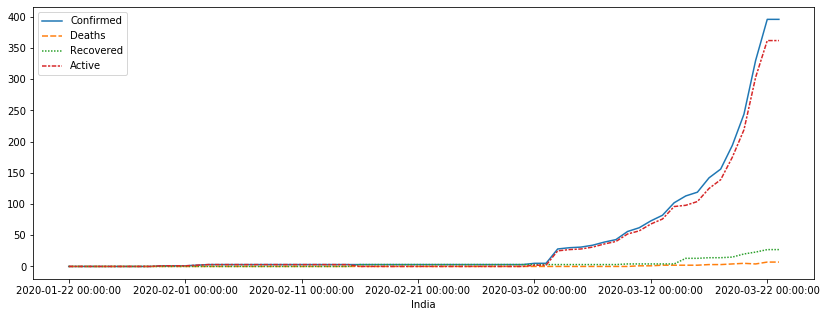

44 . Philippines
Confirmed: 380.0 
Active: 338.0 
Recovered: 17.0 
Deaths: 25.0


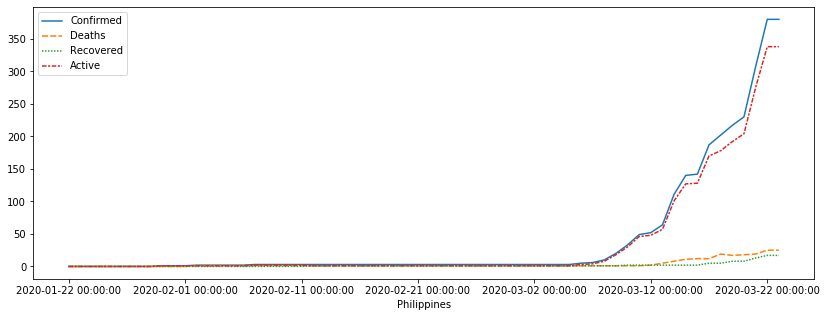

45 . Russia
Confirmed: 367.0 
Active: 351.0 
Recovered: 16.0 
Deaths: 0.0


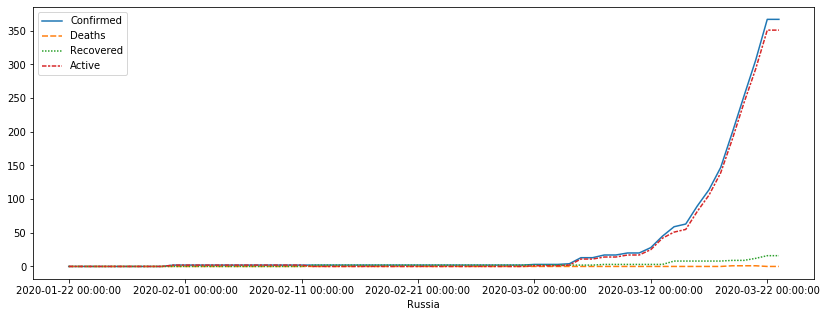

46 . Peru
Confirmed: 363.0 
Active: 357.0 
Recovered: 1.0 
Deaths: 5.0


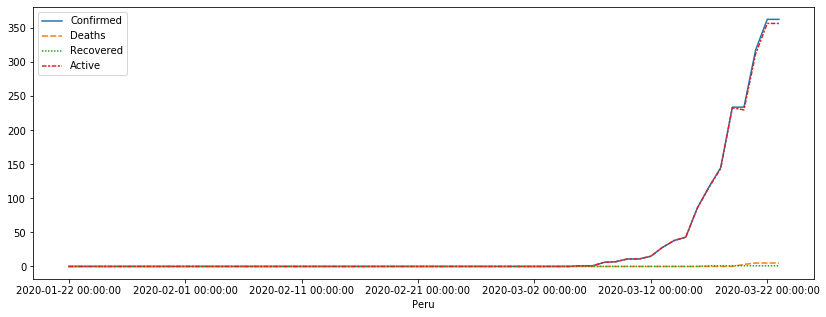

47 . Bahrain
Confirmed: 332.0 
Active: 181.0 
Recovered: 149.0 
Deaths: 2.0


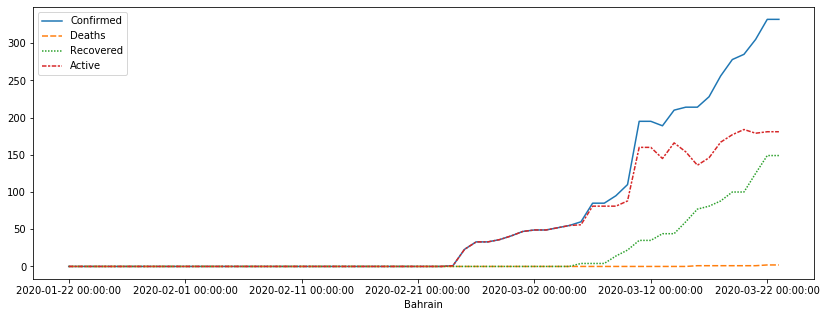

48 . Egypt
Confirmed: 327.0 
Active: 257.0 
Recovered: 56.0 
Deaths: 14.0


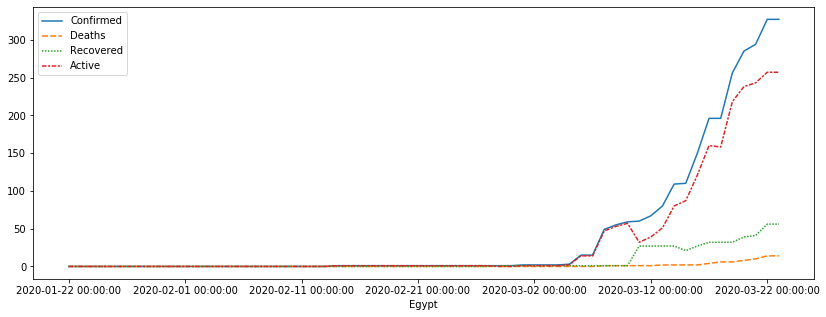

49 . Estonia
Confirmed: 326.0 
Active: 324.0 
Recovered: 2.0 
Deaths: 0.0


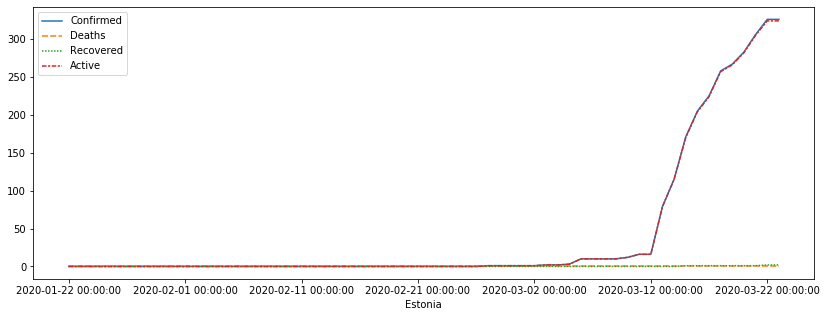

50 . South Africa
Confirmed: 274.0 
Active: 274.0 
Recovered: 0.0 
Deaths: 0.0


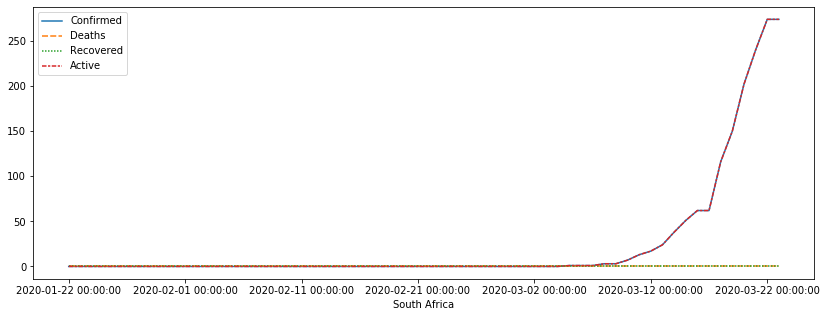

In [8]:
for index, country in enumerate(top_50.index):
    print(index+1,'.', country)
    print('Confirmed:', top_50.Confirmed[country],'\n'\
          'Active:', top_50.Active[country],'\n'\
          'Recovered:', top_50.Recovered[country],'\n'\
          'Deaths:', top_50.Deaths[country]
         )
    show_increment(covid_19_df, country)